### Zenodo’s REST API

In [13]:
import requests
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import os
import warnings
warnings.filterwarnings("ignore")

#### We would need to specify some arguments to reduce the search

In [3]:
parameters = {
    "sort":"mostrecent",
    "communities": "kth",
    'size':2000}
r= requests.get('https://zenodo.org/api/records', params=parameters)
community_entries=r.json()
community_entries.keys()

dict_keys(['aggregations', 'hits', 'links'])

In [4]:
r.url

'https://zenodo.org/api/records/?sort=mostrecent&communities=kth&size=2000'

No token is needed to fetch/communicate with the REST API. However, you would need to create one if you would like to write or publish through the API.

#### Summary of the request 

In [5]:
community_entries['aggregations']

{'access_right': {'buckets': [{'doc_count': 25, 'key': 'open'},
   {'doc_count': 12, 'key': 'restricted'},
   {'doc_count': 1, 'key': 'closed'}],
  'doc_count_error_upper_bound': 0,
  'sum_other_doc_count': 0},
 'file_type': {'buckets': [{'doc_count': 15, 'key': 'zip'},
   {'doc_count': 7, 'key': 'txt'},
   {'doc_count': 6, 'key': 'pdf'},
   {'doc_count': 3, 'key': 'csv'},
   {'doc_count': 2, 'key': 'npy'},
   {'doc_count': 2, 'key': 'pscx'},
   {'doc_count': 2, 'key': 'py'},
   {'doc_count': 1, 'key': 'docx'},
   {'doc_count': 1, 'key': 'fasta'},
   {'doc_count': 1, 'key': 'gz'}],
  'doc_count_error_upper_bound': 0,
  'sum_other_doc_count': 4},
 'keywords': {'buckets': [{'doc_count': 2, 'key': 'Ethnomusicology'},
   {'doc_count': 2, 'key': 'fault data'},
   {'doc_count': 2, 'key': 'time series'},
   {'doc_count': 2, 'key': 'transmission line'},
   {'doc_count': 1, 'key': 'AI ethics'},
   {'doc_count': 1,
    'key': 'AdEx neuron model, Bayesian-Hebbian plasticity,  NEST (Neural Simulat

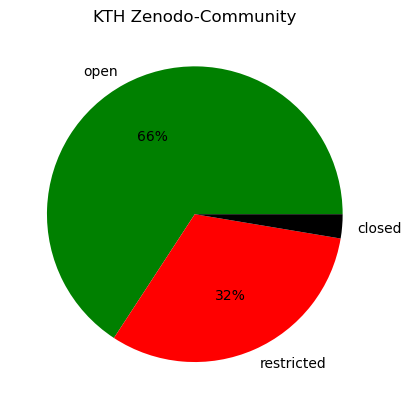

In [14]:
datas=community_entries['aggregations']["access_right"]['buckets']
data=pd.DataFrame(datas)
color={"restricted":"red","open":"green","closed":"black"}

plt.pie(data["doc_count"],
        labels =data["key"],
        autopct='%.0f%%',
        colors=[color[index] for index in data["key"]] 
       )
plt.title("KTH Zenodo-Community")
plt.show()


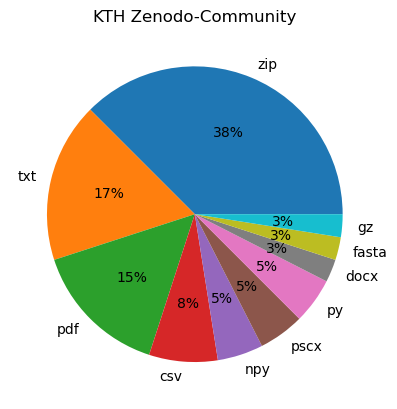

DataType,Count
zip,15
txt,7
pdf,6
csv,3
npy,2
pscx,2
py,2
docx,1
fasta,1
gz,1


In [59]:
data=pd.DataFrame(
    [
        (data['key'],data['doc_count']) for data in community_entries['aggregations']["file_type"]['buckets']
    ]
)


plt.pie(
    data[1],
    labels =data[0],
    autopct='%.0f%%',
       )
plt.title("KTH Zenodo-Community")
plt.show()

pd.DataFrame(
    {
        "DataType":data['key'],
        "Count":data['doc_count']
    } 
    for data in datas).style.hide_index()

#### Number of records in the Community

In [18]:
# print(community_entries['hits'].keys())
print("Number of records in the Community: ",community_entries['hits']['total'])

Number of records in the Community:  38


###### All records in  Zenodo kth-community

In [94]:
records=community_entries["hits"]["hits"]   
pd.DataFrame(
    {"DOI":record["doi"],
     "Access":record['metadata']['access_right'],
     "Title":record['metadata']['title'],
     "Creators":[creators['name'] for  creators in record['metadata']['creators']],
     "Keywords":record['metadata']['keywords'] if "keywords" in record['metadata'].keys() else "",
     "Created":record["created"][0:10]
    } 
    for record in records
)#.style.hide_index()


,DOI,Access,Title,Creators,Keywords,Created
0,10.5281/zenodo.8017226,restricted,Suppression of cation intermixing highly boost...,"[Fuhua Huang, Niusha Bagheri, Li Wang, Hans Åg...",,2023-06-08
1,10.5281/zenodo.8006451,restricted,"Dataset to ""Fluorescence Bar-coding and Flowme...","[Baris, Elin, Joachim, Jerker]","[photo-isomerization, transient state monitori...",2023-06-05
2,10.5281/zenodo.7995806,open,Methylation-free E.coli nanopore sequencing (O...,"[Xu, Xuechun, Jaldén, Joakim, Bhalla, Nayanika...",,2023-06-02
3,10.5281/zenodo.7928614,restricted,Photo-physical characterization of high triple...,"[Demirbay Baris, Baryshnikov Glib, Haraldsson ...","[Fluorescence, fluorescein, bromination, tripl...",2023-05-12
4,10.5281/zenodo.5884554,open,"Dataset for ""Blue-shift photoconversion of nea...","[Pennacchietti, Francesca, Alvelid, Jonatan, M...",[photoconvertible fluorescent proteins],2023-04-08
5,10.5281/zenodo.7799160,open,Ethically Aligned Stakeholder Elicitation (EASE),"[Kaila, Anna-Kaisa, Jääskeläinen, Petra, Holza...","[ethics analysis, stakeholder analysis, Value ...",2023-04-05
6,10.5281/zenodo.7732900,restricted,Photo-Isomerization of Heptamethine Cyanine Dy...,"[Elin Sandberg, Joachim Piguet, Uliana Kostiv,...",,2023-03-14
7,10.5281/zenodo.7729369,restricted,Suppression of cation intermixing highly boost...,"[Fuhua Huang, Niusha Bagheri, Li Wang, Hans Åg...",,2023-03-13
8,10.5281/zenodo.7726192,open,"Dataset for the published article ""Quantum ver...","[Tolias, Panagiotis, Lucco Castello, Federico,...","[warm dense matter, strongly coupled electron ...",2023-03-12
9,10.5281/zenodo.7584933,restricted,Frequency-domain method for characterization o...,"[Lucía Labrador-Páez, Jouko Kankare, Iko Hyppä...",,2023-01-30


#### The content of the one record of the payload - It contain all the info that we can also find in Zenodo

In [88]:
# community_entries['hits']['hits'][2]

In [95]:
## metadata for id: 5101626 	 Philip Tully
# record= requests.get('https://zenodo.org/api/records/5101626', params=parameters).json()
# print(record.keys())
# record["metadata"]

In [14]:
## files in record with id:5101626
## Tolias, Panagiotis
r= requests.get('https://zenodo.org/api/records/5101626', params=parameters).json()
print(f"{entry['id']}  {r['metadata']['creators'][0]['name']} \t\t {r['metadata']['title']}")
print()
print("files:")
for file in record['files']:
    print(file['links']['self'])

4030660  Philip Tully 		 Bayesian Confidence Propagation Neural Network (BCPNN) learning rule module in NEST v2.2.2

files:
https://zenodo.org/api/files/6441afb5-da1c-4eab-8ee4-03fdc04c4bb6/BCPNN_NEST_Module.zip


In [15]:
## files in record with id:5741363
## Rosa Lönneborg Creating a Data Management Plan with DMP online
rosa = requests.get('https://zenodo.org/api/records/5741363', params=parameters).json()
print(f"{entry['id']}  {rosa['metadata']['creators'][0]['name']} \t\t {rosa['metadata']['title']}")
print()
print("files:")
for file in rosa['files']:
    print(file['links']['self'])

4030660  Rosa Lönneborg 		 Creating a Data Management Plan with DMP online

files:
https://zenodo.org/api/files/2706e0cf-cb82-4856-89c9-d210d47e5f5a/Creating%20a%20Data%20management%20plan%20nov2021.pdf


### plot

<AxesSubplot: title={'center': 'KTH Community'}, xlabel='month', ylabel='results'>

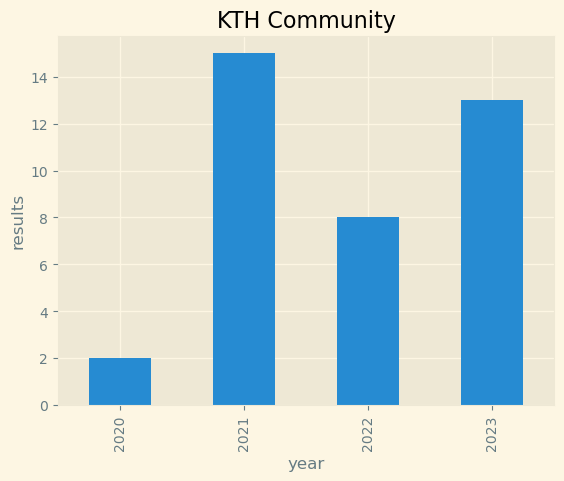

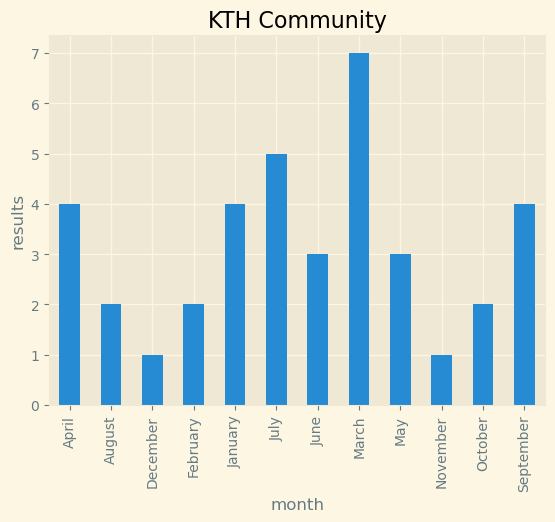

In [96]:
publication_date=[pd.to_datetime(community_entries["hits"]["hits"][i]["metadata"]["publication_date"][0:10]) for i in range(len(community_entries["hits"]["hits"]))]# keys()



data= {"publication_date":np.array(publication_date)}
pub_date=pd.DataFrame(data)
pub_date["number_of_publication"]=np.ones((len(community_entries["hits"]["hits"]),1))

Publication_date=pub_date.set_index("publication_date")

index_year=Publication_date.index.year

plt.style.use('Solarize_Light2')
Publication_date.groupby(index_year).count().plot.bar(title="KTH Community",ylabel="results",xlabel="year",legend=False)


index_month=Publication_date.index.month_name()
Publication_date.groupby(index_month).count().plot.bar(title="KTH Community",ylabel="results",xlabel="month",legend=False)